# EDA and Feature Engineering

##  Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set styles for plots
sns.set(style="whitegrid")

## Load and Preview Dataset

In [2]:
# Load the dataset
file_path = "diabetes.csv"  # Replace this with your file path if needed
data = pd.read_csv(file_path)

# Preview the dataset
print("Dataset preview:")
data.head()

Dataset preview:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Check for Missing Values

In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

# Optional: You can decide to handle missing values here (if any are found).


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Basic Statistics

In [4]:
# Summary statistics for numerical columns
print("Basic Statistics for Numerical Features:")
data.describe()


Basic Statistics for Numerical Features:


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

##  Correlation Heatmap

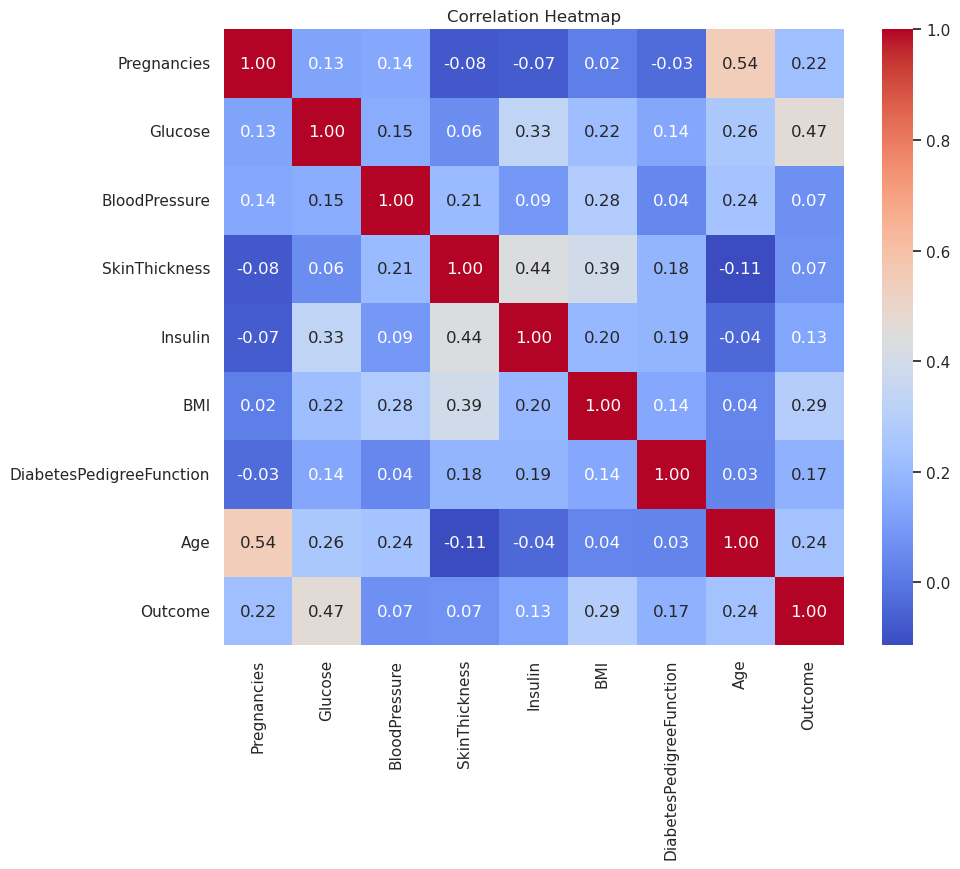

In [5]:

# Correlation heatmap to understand relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Outcome Distribution

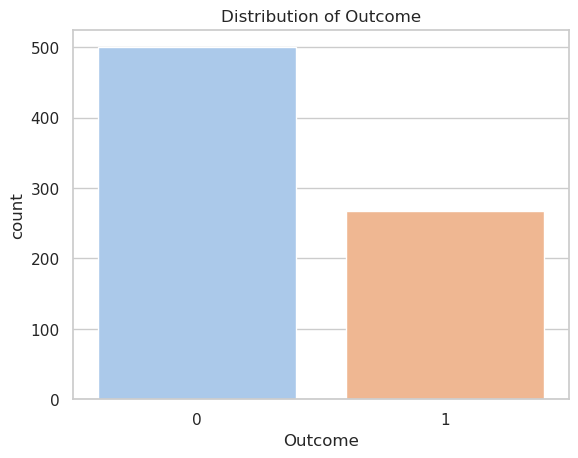

In [6]:

# Visualize the distribution of the target variable (Outcome)
sns.countplot(x="Outcome", data=data, palette="pastel")
plt.title("Distribution of Outcome")
plt.show()

## Feature Distributions

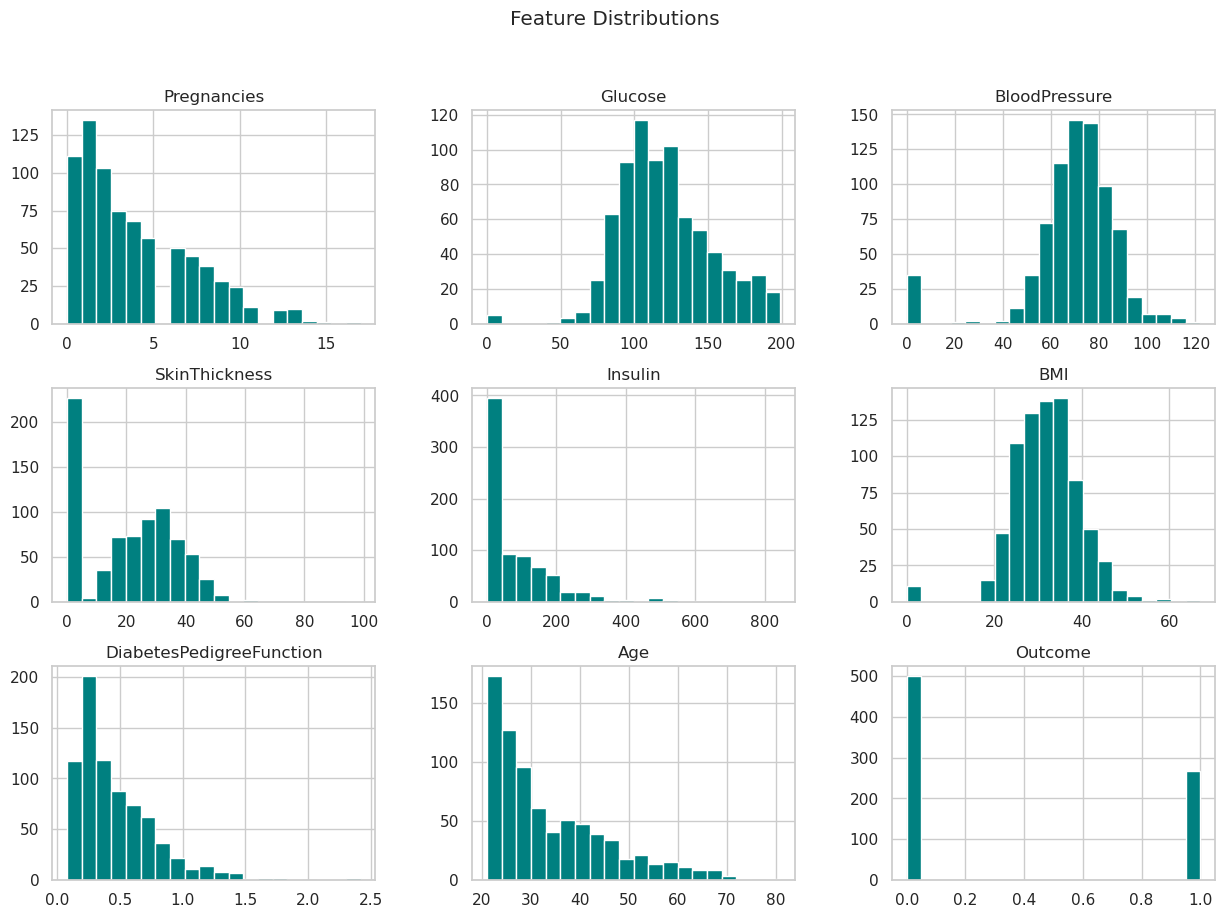

In [7]:
# Plot histograms for all numerical features
data.hist(bins=20, figsize=(15, 10), color="teal")
plt.suptitle("Feature Distributions")
plt.show()

## Boxplots for Outlier Detection

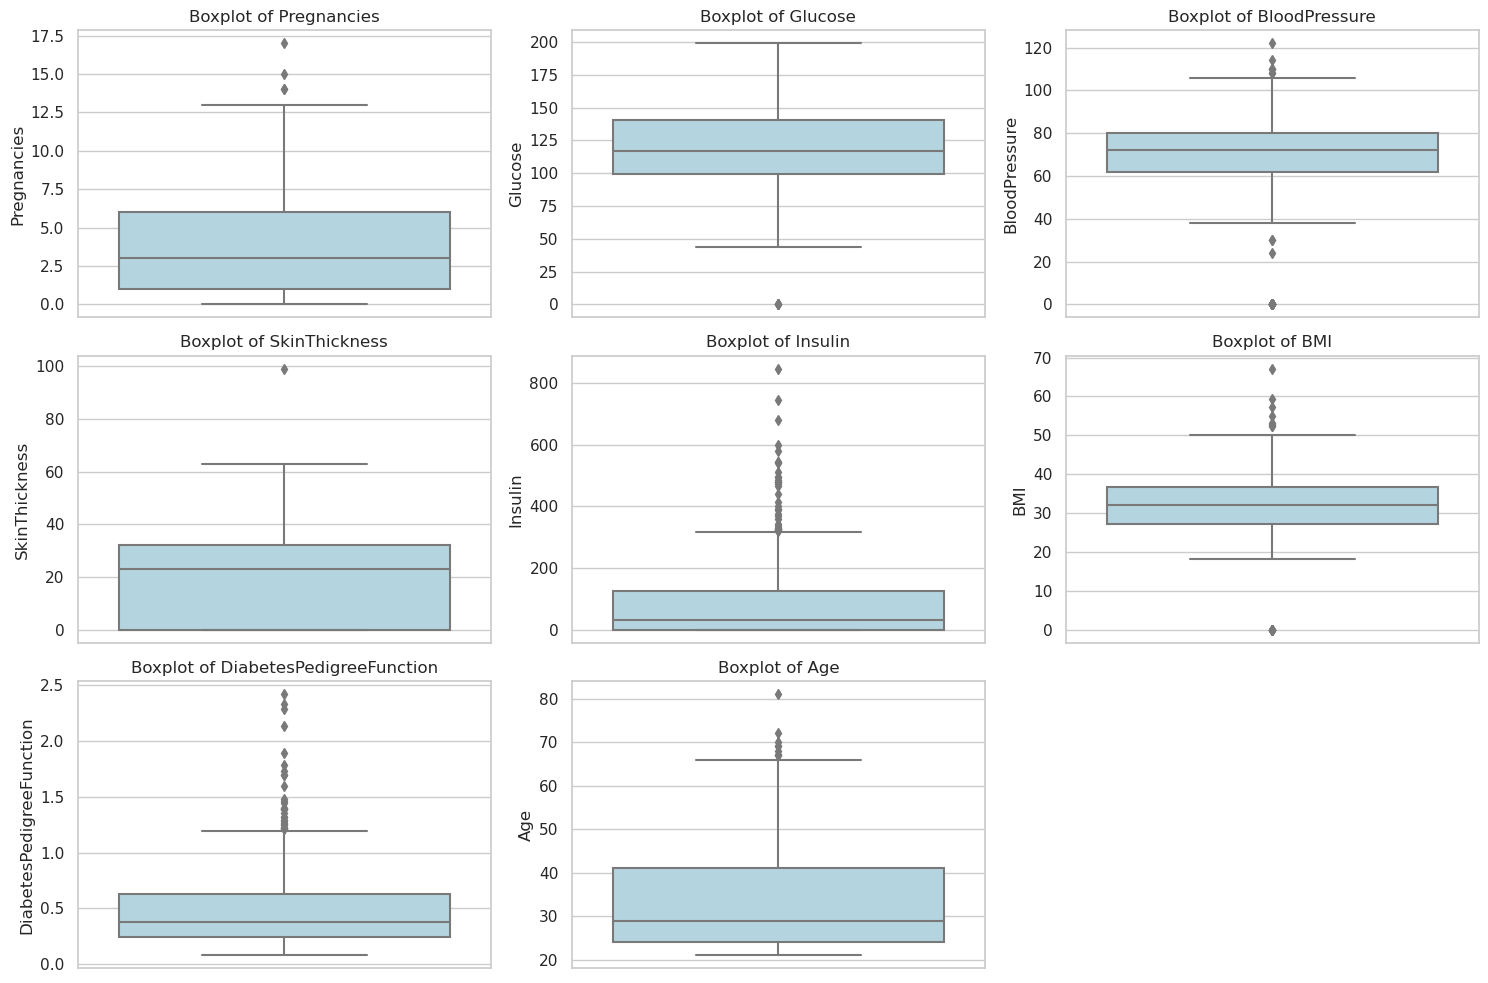

In [8]:
# Boxplots to detect potential outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1], 1):  # Exclude 'Outcome'
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

##  BMI Category

In [9]:
# Define a function to classify BMI into categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Apply the function to create a new column
data['BMI_Category'] = data['BMI'].apply(bmi_category)

print("Added 'BMI_Category' feature:")
data[['BMI', 'BMI_Category']].head()

Added 'BMI_Category' feature:


BMI BMI_Category
0  33.6        Obese
1  26.6   Overweight
2  23.3       Normal
3  28.1   Overweight
4  43.1        Obese

## Age Group

In [10]:
# Define a function to classify Age into groups
def age_group(age):
    if age < 30:
        return "Young"
    elif 30 <= age < 50:
        return "Middle-aged"
    else:
        return "Senior"

# Apply the function to create a new column
data['Age_Group'] = data['Age'].apply(age_group)

print("Added 'Age_Group' feature:")
data[['Age', 'Age_Group']].head()


Added 'Age_Group' feature:


Age    Age_Group
0   50       Senior
1   31  Middle-aged
2   32  Middle-aged
3   21        Young
4   33  Middle-aged

### Replace Zeroes in Key Columns

In [11]:
# Replace zeros in selected columns with NaN for cleaning
columns_with_zero_issues = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN column by column
for col in columns_with_zero_issues:
    data[col] = data[col].replace(0, np.nan)

# Check the changes
print("Data after replacing zeros with NaN:")
data[columns_with_zero_issues].head()


Data after replacing zeros with NaN:


Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0      NaN  33.6
1     85.0           66.0           29.0      NaN  26.6
2    183.0           64.0            NaN      NaN  23.3
3     89.0           66.0           23.0     94.0  28.1
4    137.0           40.0           35.0    168.0  43.1

### Outlier Detection and Treatment

In [12]:
# Function to cap outliers using the IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply capping for selected numerical columns
numerical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
data[numerical_cols] = data[numerical_cols].apply(cap_outliers)

# Check the effect of outlier treatment
print("Data after outlier capping:")
data[numerical_cols].describe()


Data after outlier capping:


Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  763.000000     733.000000     541.000000  394.000000  757.000000   
mean   121.686763      72.375171      29.059150  146.500000   32.394716   
std     30.535641      11.973207      10.057253   90.348842    6.715793   
min     44.000000      40.000000       7.000000   14.000000   18.200000   
25%     99.000000      64.000000      22.000000   76.250000   27.500000   
50%    117.000000      72.000000      29.000000  125.000000   32.300000   
75%    141.000000      80.000000      36.000000  190.000000   36.600000   
max    199.000000     104.000000      57.000000  360.625000   50.250000   

              Age  
count  768.000000  
mean    33.199870  
std     11.628404  
min     21.000000  
25%     24.000000  
50%     29.000000  
75%     41.000000  
max     66.500000

### Feature Engineering - Glucose-to-Insulin Ratio

In [13]:
# Create a new feature: Glucose-to-Insulin ratio
data['Glucose_Insulin_Ratio'] = data['Glucose'] / (data['Insulin'] + 1)  # Avoid division by zero

# Inspect the new feature
print("Glucose-to-Insulin Ratio Feature:")
data[['Glucose', 'Insulin', 'Glucose_Insulin_Ratio']].head()


Glucose-to-Insulin Ratio Feature:


Glucose  Insulin  Glucose_Insulin_Ratio
0    148.0      NaN                    NaN
1     85.0      NaN                    NaN
2    183.0      NaN                    NaN
3     89.0     94.0               0.936842
4    137.0    168.0               0.810651

### Normalize Features

In [14]:

# Normalize numerical features
scaler = MinMaxScaler()
normalized_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
data[normalized_cols] = scaler.fit_transform(data[normalized_cols])

# Check normalized data
print("Normalized Data:")
data[normalized_cols].head()


Normalized Data:


Glucose  BloodPressure  SkinThickness   Insulin       BMI       Age
0  0.670968        0.50000           0.56       NaN  0.480499  0.637363
1  0.264516        0.40625           0.44       NaN  0.262090  0.219780
2  0.896774        0.37500            NaN       NaN  0.159126  0.241758
3  0.290323        0.40625           0.32  0.230797  0.308892  0.000000
4  0.600000        0.00000           0.56  0.444284  0.776911  0.263736

### Interaction Features

In [15]:
# Create interaction features
data['BMI_Age_Interaction'] = data['BMI'] * data['Age']

# Inspect the new interaction feature
print("BMI and Age Interaction Feature:")
data[['BMI', 'Age', 'BMI_Age_Interaction']].head()

BMI and Age Interaction Feature:


BMI       Age  BMI_Age_Interaction
0  0.480499  0.637363             0.306252
1  0.262090  0.219780             0.057602
2  0.159126  0.241758             0.038470
3  0.308892  0.000000             0.000000
4  0.776911  0.263736             0.204900

## Inspect the Final DataFrame

In [16]:
# Display a concise summary of the dataframe
print("DataFrame Summary:")
data.info()

# Display the first few rows of the dataframe
print("\nFirst 5 rows of the cleaned DataFrame:")
data.head()

# Display statistics for numerical columns
print("\nStatistical Summary of Numerical Columns:")
data.describe()

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
 9   BMI_Category              768 non-null    object 
 10  Age_Group                 768 non-null    object 
 11  Glucose_Insulin_Ratio     393 non-null    float64
 12  BMI_Age_Interaction       757 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usag

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052    0.501205       0.505862       0.441183    0.382257   
std       3.369578    0.197004       0.187081       0.201145    0.260653   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000    0.354839       0.375000       0.300000    0.179589   
50%       3.000000    0.470968       0.500000       0.440000    0.320231   
75%       6.000000    0.625806       0.625000       0.580000    0.507753   
max      17.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  757.000000                768.000000  768.000000  768.000000   
mean     0.442893                  0.471876    0.268129    0.348958   
std      0.209541                  0.331329    0.255569    0.476951   
min      0.000000                  0.078000    0.000000    0.000000   
25%      0.290172                  0.243750    0.065934    0.000000   
50%      0.439938                  0.372500    0.175824    0.000000   
75%      0.574103                  0.626250    0.439560    1.000000   
max      1.000000                  2.420000    1.000000    1.000000   

       Glucose_Insulin_Ratio  BMI_Age_Interaction  
count             393.000000           757.000000  
mean                1.144203             0.121093  
std                 0.893468             0.127393  
min                 0.322086             0.000000  
25%                 0.666667             0.020709  
50%                 0.984733             0.080232  
75%                 1.313953             0.185425  
max                12.000000             0.718040

##  Visualize the DataFrame

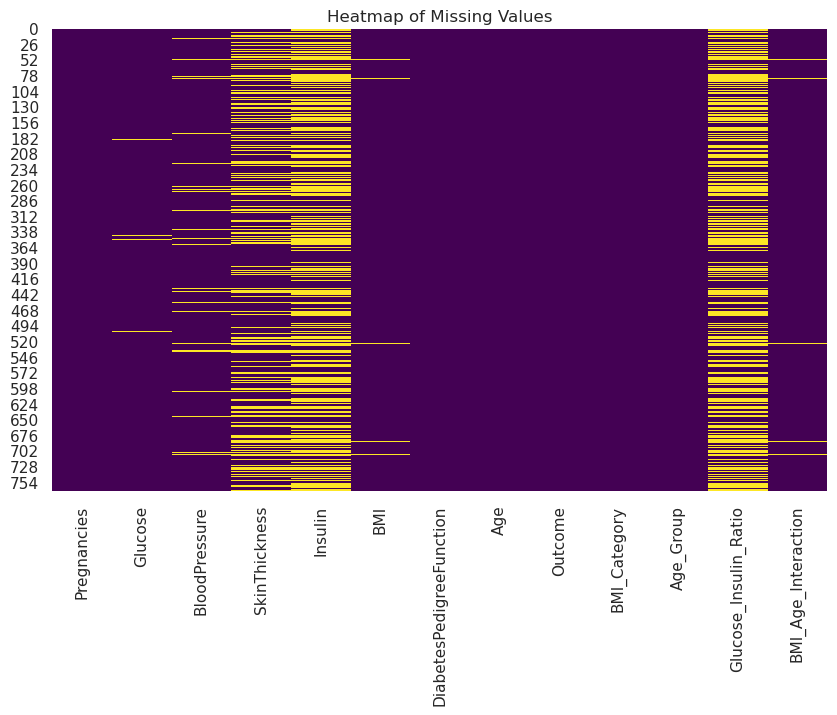

In [17]:

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


### Pairplot to observe relationships

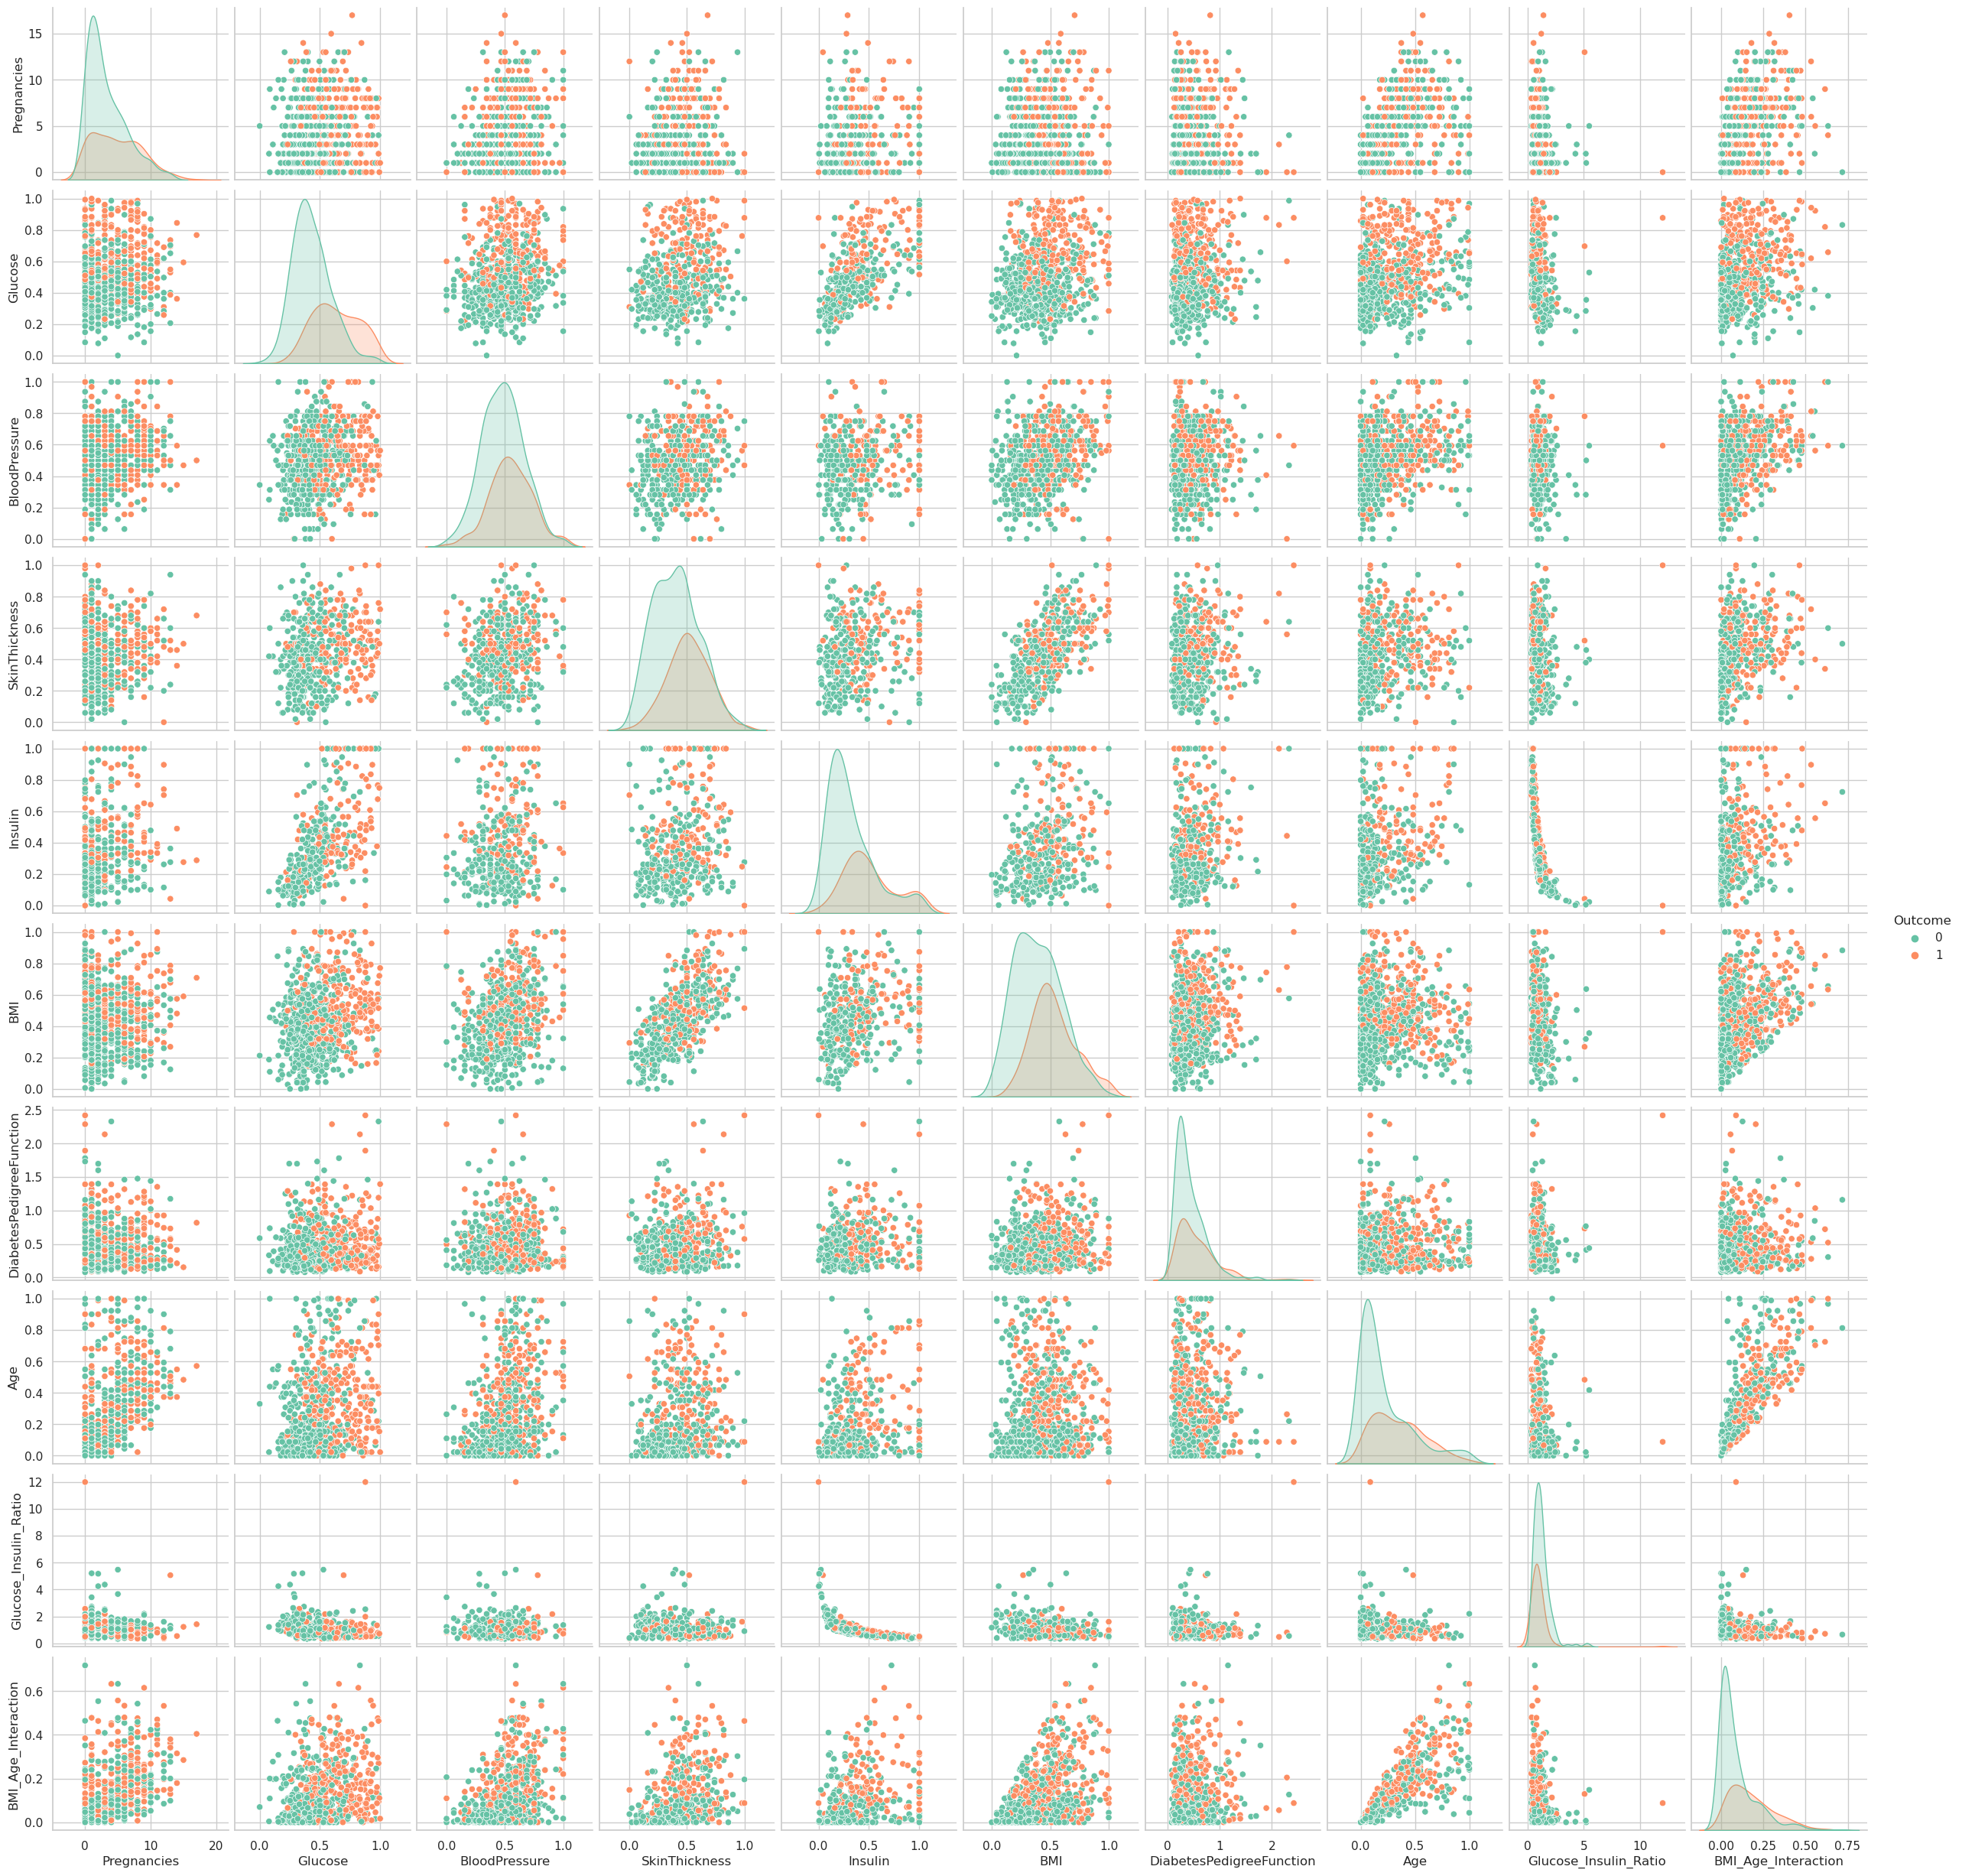

In [18]:
# Pairplot to observe relationships
sns.pairplot(data, hue='Outcome', diag_kind='kde', palette='Set2')
plt.show()


### Distribution of Target Classes

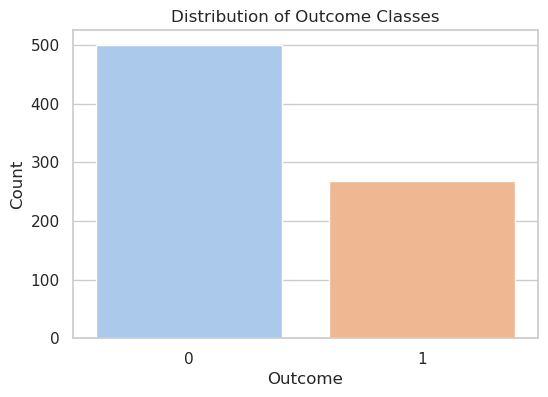

In [19]:
# Bar plot for target class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data, palette='pastel')
plt.title('Distribution of Outcome Classes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### Correlation Matrix

/tmp/ipykernel_7182/814160273.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


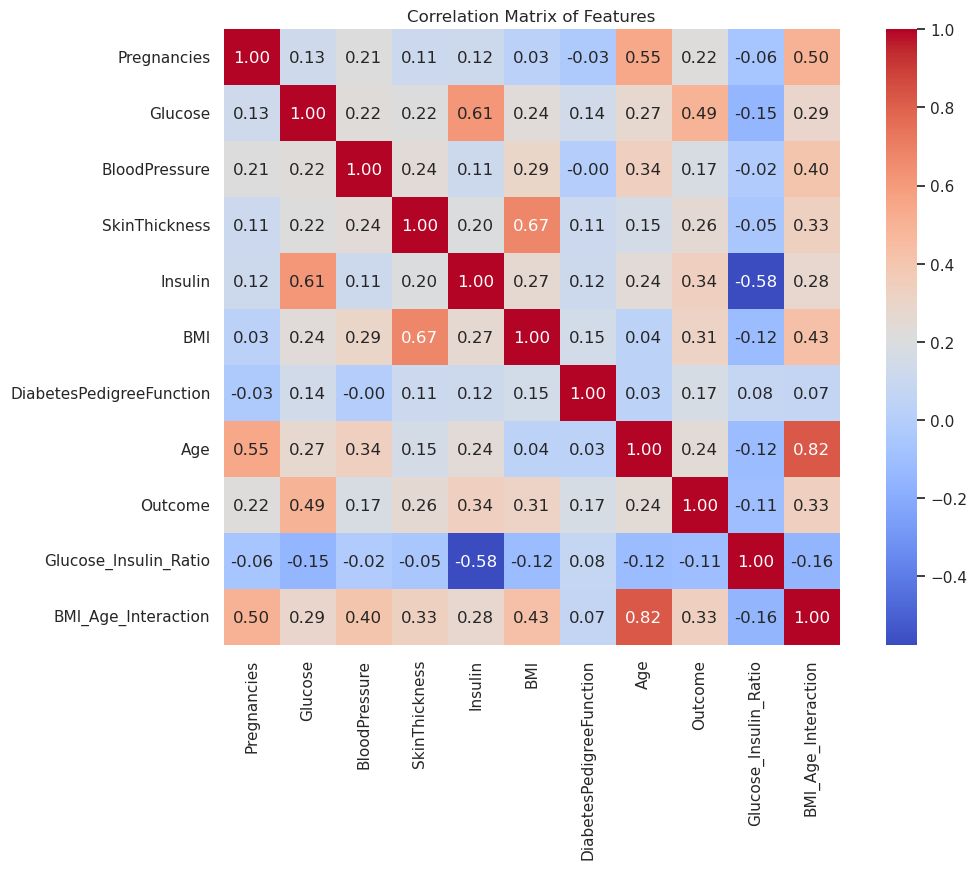

In [20]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()


## Save the Cleaned Data

In [21]:
# Save the cleaned data to a CSV file
cleaned_file_path = '../midter_proj/cleaned_diabetes_data.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to ../midter_proj/cleaned_diabetes_data.csv


## These abow visualizations will help confirm that:

### 1.Missing values have been handled.
### 2.The distribution of classes and numerical features looks reasonable.
### 3.Relationships between features can guide further modeling steps.